# Working with Time Series Data

In [1]:
import pandas as pd
from vega_datasets import data
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


1. Resample by the day and take the average temperature. Visualize the average temperature over time.


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [3]:
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [4]:
df.asfreq('D')[:10]

,temp
date,
2010-01-01,47.8
2010-01-02,47.9
2010-01-03,48.0
2010-01-04,48.1
2010-01-05,48.0
2010-01-06,48.1
2010-01-07,48.1
2010-01-08,48.0
2010-01-09,48.0


In [5]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

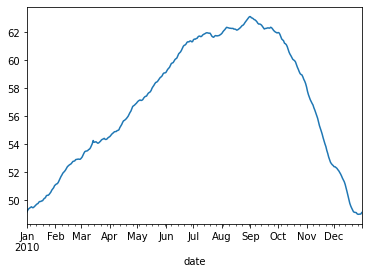

In [6]:
df.resample('D').mean().temp.plot()

2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

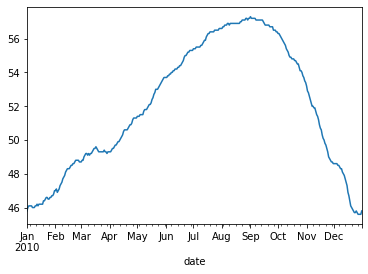

In [7]:
df.resample('D').min().temp.plot()

3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

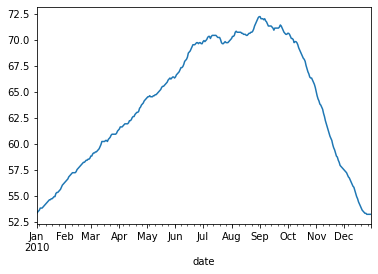

In [8]:
df.resample('D').max().temp.plot()

4. Which month is the coldest, on average?


In [9]:
# resample monthly and use mean for aggregation

df.resample('M').mean().head()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968


In [10]:
df.resample('M').mean().min().temp

49.984139784946244

In [11]:
df['avg_monthly_temp'] = df.resample('M').temp.transform('mean')
df.head()

,temp,avg_monthly_temp
date,,
2010-01-01 00:00:00,47.8,49.98414
2010-01-01 01:00:00,47.4,49.98414
2010-01-01 02:00:00,46.9,49.98414
2010-01-01 03:00:00,46.5,49.98414
2010-01-01 04:00:00,46.0,49.98414


In [12]:
lowest_avg_temp = df.resample('M').mean().min().temp

In [13]:
lowest_avg_temp

49.984139784946244

In [14]:
df['month'] = df.index.month_name()
df.head()

,temp,avg_monthly_temp,month
date,,,
2010-01-01 00:00:00,47.8,49.98414,January
2010-01-01 01:00:00,47.4,49.98414,January
2010-01-01 02:00:00,46.9,49.98414,January
2010-01-01 03:00:00,46.5,49.98414,January
2010-01-01 04:00:00,46.0,49.98414,January


In [15]:
coldest_month = df['month'][df['avg_monthly_temp'] == lowest_avg_temp]
coldest_month[1]

'January'

5. Which month has the highest average temperature?

In [16]:
df.resample('M').mean().max().temp

62.48708333333335

In [17]:
highest_avg_temp = df.resample('M').mean().max().temp

In [18]:
hotest_month = df['month'][df['avg_monthly_temp'] == highest_avg_temp]
hotest_month[1]

'September'

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [25]:
df['avg_daily_temp'] = df.resample('D').temp.transform('mean')
df.head()

,temp,avg_monthly_temp,month,avg_daily_temp,max_daily_temp,min_daily_temp,temp_change_per_day
date,,,,,,,
2010-01-01 00:00:00,47.8,49.98414,January,49.170833,53.3,45.8,7.5
2010-01-01 01:00:00,47.4,49.98414,January,49.170833,53.3,45.8,7.5
2010-01-01 02:00:00,46.9,49.98414,January,49.170833,53.3,45.8,7.5
2010-01-01 03:00:00,46.5,49.98414,January,49.170833,53.3,45.8,7.5
2010-01-01 04:00:00,46.0,49.98414,January,49.170833,53.3,45.8,7.5


In [26]:
df['max_daily_temp'] = df.resample('D').temp.transform('max')
df['min_daily_temp'] = df.resample('D').temp.transform('min')
df.head()

,temp,avg_monthly_temp,month,avg_daily_temp,max_daily_temp,min_daily_temp,temp_change_per_day
date,,,,,,,
2010-01-01 00:00:00,47.8,49.98414,January,49.170833,53.3,45.8,7.5
2010-01-01 01:00:00,47.4,49.98414,January,49.170833,53.3,45.8,7.5
2010-01-01 02:00:00,46.9,49.98414,January,49.170833,53.3,45.8,7.5
2010-01-01 03:00:00,46.5,49.98414,January,49.170833,53.3,45.8,7.5
2010-01-01 04:00:00,46.0,49.98414,January,49.170833,53.3,45.8,7.5


In [27]:
df['temp_change_per_day'] = df['max_daily_temp'] - df['min_daily_temp']
df.head()

,temp,avg_monthly_temp,month,avg_daily_temp,max_daily_temp,min_daily_temp,temp_change_per_day
date,,,,,,,
2010-01-01 00:00:00,47.8,49.98414,January,49.170833,53.3,45.8,7.5
2010-01-01 01:00:00,47.4,49.98414,January,49.170833,53.3,45.8,7.5
2010-01-01 02:00:00,46.9,49.98414,January,49.170833,53.3,45.8,7.5
2010-01-01 03:00:00,46.5,49.98414,January,49.170833,53.3,45.8,7.5
2010-01-01 04:00:00,46.0,49.98414,January,49.170833,53.3,45.8,7.5


In [49]:
highest_daily_variability = df.resample('M').mean().temp_change_per_day[1]

In [50]:
highest_daily_variability

9.48571428571432

In [38]:
highest_variability_month = df['month'][df['temp_change_per_day'] == df.temp_change_per_day.max()][1]

In [39]:
highest_variability_month

'August'